In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


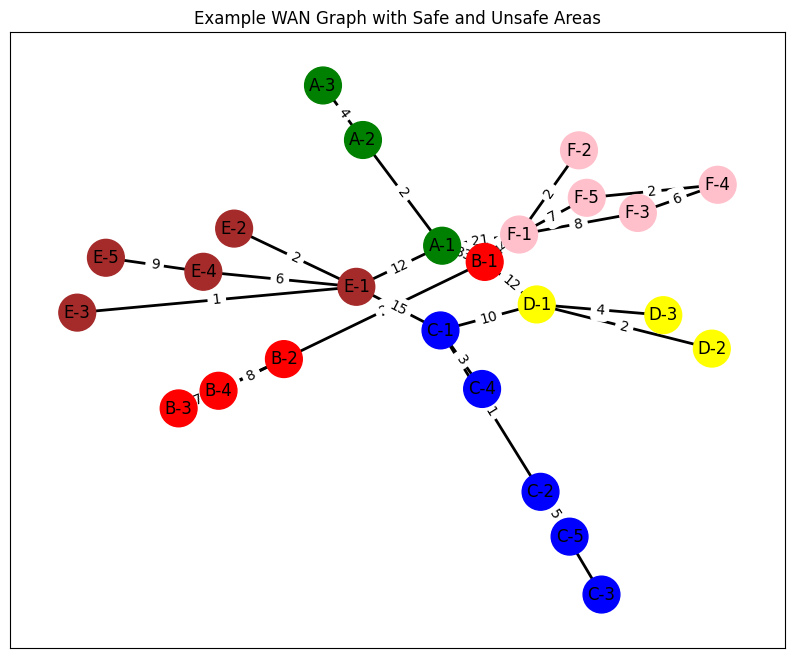

In [45]:
G = nx.Graph()

# Adding nodes for Area A (Safe Area)
G.add_node('A-1', label='Gateway', area='A-Safe')
G.add_node('A-2', label='Node', area='A-Safe')
G.add_node('A-3', label='Node', area='A-Safe')

# Adding nodes for Area B (Unsafe Area)
G.add_node('B-1', label='Gateway', area='B-Unsafe')
G.add_node('B-2', label='Node', area='B-Unsafe')
G.add_node('B-3', label='Node', area='B-Unsafe')
G.add_node('B-4', label='Node', area='B-Unsafe')

# Adding nodes for Area C (Safe Area)
G.add_node('C-1', label='Gateway', area='C-Safe')
G.add_node('C-2', label='Node', area='C-Safe')
G.add_node('C-3', label='Node', area='C-Safe')
G.add_node('C-4', label='Node', area='C-Safe')
G.add_node('C-5', label='Node', area='C-Safe')

# Adding nodes for Area 3 (Safe Area)
G.add_node('D-1', label='Gateway', area='D-Safe')
G.add_node('D-2', label='Node', area='D-Safe')
G.add_node('D-3', label='Node', area='D-Safe')

# Adding nodes for Area E (Safe Area)
G.add_node('E-1', label='Gateway', area='E-Safe')
G.add_node('E-2', label='Node', area='E-Safe')
G.add_node('E-3', label='Node', area='E-Safe')
G.add_node('E-4', label='Node', area='E-Safe')
G.add_node('E-5', label='Node', area='E-Safe')

# Adding nodes for Area F (Safe Area)
G.add_node('F-1', label='Gateway', area='F-Unsafe')
G.add_node('F-2', label='Node', area='F-Unsafe')
G.add_node('F-3', label='Node', area='F-Unsafe')
G.add_node('F-4', label='Node', area='F-Unsafe')
G.add_node('F-5', label='Node', area='F-Unsafe')

# Adding edges for Area 1 (Safe Area)
G.add_edges_from([('A-1', 'A-2',{'weight':2}), ('A-2', 'A-3',{'weight': 4})
                 , ('A-1', 'F-1',{'weight': 21}), ('A-1', 'B-1',{'weight': 33})
                 , ('A-1', 'E-1',{'weight': 12})
                 ])

G.add_edges_from([('B-1', 'B-2',{'weight':2}), ('B-2', 'B-3',{'weight': 3}), 
                  ('B-3', 'B-4',{'weight': 7}), ('B-4', 'B-2',{'weight': 8})
                 , ('B-1', 'D-1',{'weight': 12}), ('B-1', 'F-1',{'weight': 44})])

G.add_edges_from([('C-1', 'C-2',{'weight':1}), ('C-2', 'C-3',{'weight': 1}), 
                  ('C-2', 'C-5',{'weight': 5}), ('C-1', 'C-4',{'weight': 3})
                 , ('C-1', 'D-1',{'weight': 10}), ('C-1', 'E-1',{'weight': 15})])

G.add_edges_from([('D-1', 'D-2',{'weight':2}), ('D-1', 'D-3',{'weight': 4})])

G.add_edges_from([('E-1', 'E-2',{'weight':2}), ('E-1', 'E-3',{'weight': 1}), 
                  ('E-1', 'E-4',{'weight': 6}), ('E-4', 'E-5',{'weight': 9})])

G.add_edges_from([('F-1', 'F-2',{'weight':2}), ('F-1', 'F-3',{'weight': 8}), 
                  ('F-1', 'F-5',{'weight': 7}),('F-5', 'F-4',{'weight': 2}),
                  ('F-4', 'F-3',{'weight': 5}),('F-3', 'F-4',{'weight': 6})])

# Draw the graph
plot_Graph(G)


In [44]:
def plot_Graph(G):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=5)  # positions for all nodes
    
    # Draw nodes with different colors for safe and unsafe areas
    color_map =[]
    for node, data in G.nodes(data=True):
        if 'A-' in data['area']:
            color_map.append('green')
        elif 'B-' in data['area']:
            color_map.append('red')
        elif 'C-' in data['area']:
            color_map.append('blue')
        elif 'D-' in data['area']:
            color_map.append('yellow')
        elif 'E-' in data['area']:
            color_map.append('brown')
        elif 'F-' in data['area']:
            color_map.append('pink')
    
    nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=700)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2)
    
    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    
    # Show the plot
    plt.title('Example WAN Graph with Safe and Unsafe Areas')
    plt.show()



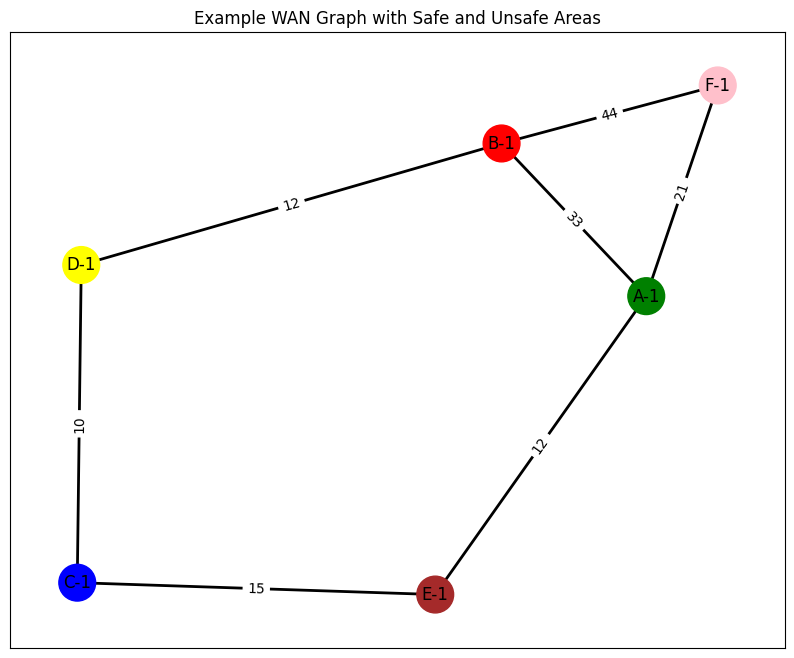

In [46]:
gateway_nodes = [node for node, data in G.nodes(data=True) if data.get('label') == 'Gateway']
G_gateway = G.subgraph(gateway_nodes)
plot_Graph(G_gateway)

In [47]:
df = nx.to_pandas_adjacency(G_gateway, weight='weight')
# df = df.drop(index=['A-2', 'A-3','B-2', 'B-3','B-4', 'C-2','C-3', 'C-5','C-4', 'D-2','D-3','E-2','E-3', 'E-5','E-4','F-2','F-3', 'F-5','F-4'])
# df = df.drop(columns=['A-2', 'A-3','B-2', 'B-3','B-4', 'C-2','C-3', 'C-5','C-4', 'D-2','D-3','E-2','E-3', 'E-5','E-4','F-2','F-3', 'F-5','F-4'])
df = df.replace(0, np.inf)
np.fill_diagonal(df.values, 0)
#this is the adj matrix just between gateways
print(df)

      D-1   B-1   F-1   A-1   C-1   E-1
D-1   0.0  12.0   inf   inf  10.0   inf
B-1  12.0   0.0  44.0  33.0   inf   inf
F-1   inf  44.0   0.0  21.0   inf   inf
A-1   inf  33.0  21.0   0.0   inf  12.0
C-1  10.0   inf   inf   inf   0.0  15.0
E-1   inf   inf   inf  12.0  15.0   0.0


In [48]:
#this algorithem used for dataframe as input
def floyd_warshall(df):
    dist = df.copy()

    n = len(df)

    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist.iloc[i, j] = min(dist.iloc[i, j], dist.iloc[i, k] + dist.iloc[k, j])
    
    return dist

In [49]:
shortest_paths_between_gates = floyd_warshall(df)
print("Shortest Paths Between Gates Matrix :")
print(shortest_paths)

Shortest Paths Between Gates Matrix :
      A-1   B-1   C-1   D-1   E-1   F-1
A-1   0.0  33.0  27.0  37.0  12.0  21.0
B-1  33.0   0.0  22.0  12.0  37.0  44.0
C-1  27.0  22.0   0.0  10.0  15.0  48.0
D-1  37.0  12.0  10.0   0.0  25.0  56.0
E-1  12.0  37.0  15.0  25.0   0.0  33.0
F-1  21.0  44.0  48.0  56.0  33.0   0.0
